<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 157.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 168.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 114.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 137.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 94.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 140.5 MB/s eta 0:00:00


## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [2]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [3]:

summary = pd.DataFrame({
    'Non-Null Count': df.notnull().sum(),
    'Missing Values': df.isnull().sum(),
    'Data Type': df.dtypes
})

print(summary)

                     Non-Null Count  Missing Values Data Type
ResponseId                    65437               0     int64
MainBranch                    65437               0    object
Age                           65437               0    object
Employment                    65437               0    object
RemoteWork                    54806           10631    object
...                             ...             ...       ...
JobSatPoints_11               29445           35992   float64
SurveyLength                  56182            9255    object
SurveyEase                    56238            9199    object
ConvertedCompYearly           23435           42002   float64
JobSat                        29126           36311   float64

[114 rows x 3 columns]


<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [4]:
summary = df.describe()
print(summary)

         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.000000        0.000000   
50%    32719.000000   1.100000e+05      9.000000       10.000000   
75%    49078.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29393.000000    29411.000000    29450.000000     29448.00000   
mean         7.522140       10.060857       24.343232        22.96522   
std         18.422661       21.833836       27.089360        27.01774   
min          0.000000        0.000000        0.000000         0.00000   
25%          0.000000 

### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [5]:
valid_countries = {
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina", 
    "Armenia", "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", 
    "Barbados", "Belarus", "Belgium", "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", 
    "Botswana", "Brazil", "Brunei", "Bulgaria", "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", 
    "Cameroon", "Canada", "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros", 
    "Congo (Brazzaville)", "Congo (Kinshasa)", "Costa Rica", "Croatia", "Cuba", "Cyprus", 
    "Czech Republic", "Denmark", "Djibouti", "Dominica", "Dominican Republic", "Ecuador", "Egypt", 
    "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini", "Ethiopia", "Fiji", 
    "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Grenada", 
    "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hungary", "Iceland", 
    "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan", 
    "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Korea, North", "Korea, South", "Kosovo", "Kuwait", 
    "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein", 
    "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta", 
    "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco", 
    "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal", 
    "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Macedonia", "Norway", 
    "Oman", "Pakistan", "Palau", "Palestine", "Panama", "Papua New Guinea", "Paraguay", "Peru", 
    "Philippines", "Poland", "Portugal", "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis", 
    "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe", 
    "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia", 
    "Slovenia", "Solomon Islands", "Somalia", "South Africa", "South Sudan", "Spain", "Sri Lanka", 
    "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Taiwan", "Tajikistan", "Tanzania", 
    "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey", 
    "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom", 
    "United States", "Uruguay", "Uzbekistan", "Vanuatu", "Vatican City", "Venezuela", "Vietnam", 
    "Yemen", "Zambia", "Zimbabwe"
}

unique_values = df['Country'].unique()

valid_countries_normalized = {country.lower() for country in valid_countries}

inconsistent_entries = []

for val in unique_values:
    if isinstance(val, str):
        val_stripped = val.strip()
        val_normalized = val_stripped.lower()

        if "..." in val_stripped:
            inconsistent_entries.append((val, "Truncated with ellipsis"))
        elif val_normalized not in valid_countries_normalized:
            inconsistent_entries.append((val, "Not in valid_countries list"))
    else:
        inconsistent_entries.append((val, "Missing or non-string value"))

# Create DataFrame of inconsistent entries
inconsistent_df = pd.DataFrame(inconsistent_entries, columns=["Entry", "Reason"])
print("Inconsistent Entries:\n", inconsistent_df)

# Identify missing or blank country entries
missing_mask = (
    df['Country'].isnull() |
    (df['Country'].astype(str).str.strip() == '') |
    (df['Country'].astype(str).str.lower() == 'nan')
)

missing_countries = df[missing_mask]


Inconsistent Entries:
                                                 Entry  \
0                            United States of America   
1   United Kingdom of Great Britain and Northern I...   
2                        Iran, Islamic Republic of...   
3                         Republic of North Macedonia   
4                                  Russian Federation   
5                         United Republic of Tanzania   
6                                            Viet Nam   
7                Venezuela, Bolivarian Republic of...   
8                                   Republic of Korea   
9                                 Republic of Moldova   
10                                        Isle of Man   
11                                            Nomadic   
12                                        South Korea   
13                                 Hong Kong (S.A.R.)   
14                   Lao People's Democratic Republic   
15                   Democratic Republic of the Congo   
16      

<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [6]:
manual_country_map = {
    "United States Of America": "United States",
    "United Kingdom Of Great Britain And Northern Ireland": "United Kingdom",
    "Iran, Islamic Republic Of...": "Iran",
    "Republic Of North Macedonia": "North Macedonia",
    "Russian Federation": "Russia",
    "United Republic Of Tanzania": "Tanzania",
    "Viet Nam": "Vietnam",
    "Venezuela, Bolivarian Republic Of...": "Venezuela",
    "Republic Of Korea": "Korea, South",
    "South Korea": "Korea, South",
    "North Korea": "Korea, North",
    "Democratic People's Republic Of Korea": "Korea, North",
    "Bosnia And Herzegovina": "Bosnia and Herzegovina",
    "Republic Of Moldova": "Moldova",
    "Isle Of Man": "United Kingdom",  # not a country, considered under UK
    "Hong Kong (S.A.R.)": "China",     # technically part of China
    "Lao People's Democratic Republic": "Laos",
    "Democratic Republic Of The Congo": "Congo (Kinshasa)",
    "Syrian Arab Republic": "Syria",
    "Swaziland": "Eswatini",
    "Côte D'Ivoire": "Ivory Coast",  # Note: not in your list, may want to add
    "Libyan Arab Jamahiriya": "Libya",
    "Cape Verde": "Cabo Verde",
    "Brunei Darussalam": "Brunei",
    "Antigua And Barbuda": "Antigua and Barbuda",
    "Saint Kitts And Nevis": "Saint Kitts and Nevis",
    "Micronesia, Federated States Of...": "Micronesia",
    "Congo, Republic Of The...": "Congo (Brazzaville)"
}

valid_countries = {
    "Afghanistan", "Albania", "Algeria", "Andorra", "Angola", "Antigua and Barbuda", "Argentina",
    "Armenia", "Australia", "Austria", "Azerbaijan", "Bahamas", "Bahrain", "Bangladesh", "Barbados",
    "Belarus", "Belgium", "Belize", "Benin", "Bhutan", "Bolivia", "Bosnia and Herzegovina", "Botswana",
    "Brazil", "Brunei", "Bulgaria", "Burkina Faso", "Burundi", "Cabo Verde", "Cambodia", "Cameroon",
    "Canada", "Central African Republic", "Chad", "Chile", "China", "Colombia", "Comoros",
    "Congo (Brazzaville)", "Congo (Kinshasa)", "Costa Rica", "Croatia", "Cuba", "Cyprus",
    "Czech Republic", "Denmark", "Djibouti", "Dominica", "Dominican Republic", "Ecuador", "Egypt",
    "El Salvador", "Equatorial Guinea", "Eritrea", "Estonia", "Eswatini", "Ethiopia", "Fiji",
    "Finland", "France", "Gabon", "Gambia", "Georgia", "Germany", "Ghana", "Greece", "Grenada",
    "Guatemala", "Guinea", "Guinea-Bissau", "Guyana", "Haiti", "Honduras", "Hungary", "Iceland",
    "India", "Indonesia", "Iran", "Iraq", "Ireland", "Israel", "Italy", "Jamaica", "Japan",
    "Jordan", "Kazakhstan", "Kenya", "Kiribati", "Korea, North", "Korea, South", "Kosovo", "Kuwait",
    "Kyrgyzstan", "Laos", "Latvia", "Lebanon", "Lesotho", "Liberia", "Libya", "Liechtenstein",
    "Lithuania", "Luxembourg", "Madagascar", "Malawi", "Malaysia", "Maldives", "Mali", "Malta",
    "Marshall Islands", "Mauritania", "Mauritius", "Mexico", "Micronesia", "Moldova", "Monaco",
    "Mongolia", "Montenegro", "Morocco", "Mozambique", "Myanmar", "Namibia", "Nauru", "Nepal",
    "Netherlands", "New Zealand", "Nicaragua", "Niger", "Nigeria", "North Macedonia", "Norway",
    "Oman", "Pakistan", "Palau", "Palestine", "Panama", "Papua New Guinea", "Paraguay", "Peru",
    "Philippines", "Poland", "Portugal", "Qatar", "Romania", "Russia", "Rwanda", "Saint Kitts and Nevis",
    "Saint Lucia", "Saint Vincent and the Grenadines", "Samoa", "San Marino", "Sao Tome and Principe",
    "Saudi Arabia", "Senegal", "Serbia", "Seychelles", "Sierra Leone", "Singapore", "Slovakia",
    "Slovenia", "Solomon Islands", "Somalia", "South Africa", "South Sudan", "Spain", "Sri Lanka",
    "Sudan", "Suriname", "Sweden", "Switzerland", "Syria", "Taiwan", "Tajikistan", "Tanzania",
    "Thailand", "Timor-Leste", "Togo", "Tonga", "Trinidad and Tobago", "Tunisia", "Turkey",
    "Turkmenistan", "Tuvalu", "Uganda", "Ukraine", "United Arab Emirates", "United Kingdom",
    "United States", "Uruguay", "Uzbekistan", "Vanuatu", "Vatican City", "Venezuela", "Vietnam",
    "Yemen", "Zambia", "Zimbabwe"
}

def clean_country(entry):
    if pd.isnull(entry):
        return None
    entry_clean = entry.strip().lower()

    if entry_clean in manual_country_map:
        return manual_country_map[entry_clean]

    formatted_entry = entry.strip().title()

    if formatted_entry in valid_countries:
        return formatted_entry

    return entry.strip()

df['Country_Cleaned'] = df['Country'].apply(clean_country)

### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [15]:
employment_encoded = pd.get_dummies(df['Employment'], prefix='Employment')

df_encoded = pd.concat([df, employment_encoded], axis=1)

print(df_encoded.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [16]:
missing_counts = df.isnull().sum()

missing_counts_sorted = missing_counts.sort_values(ascending=False)

print(missing_counts_sorted.head(10))

AINextMuch less integrated       64289
AINextLess integrated            63082
AINextNo change                  52939
AINextMuch more integrated       51999
EmbeddedAdmired                  48704
EmbeddedWantToWorkWith           47837
EmbeddedHaveWorkedWith           43223
ConvertedCompYearly              42002
AIToolNot interested in Using    41023
AINextMore integrated            41009
dtype: int64


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [18]:
mean_value = df['ConvertedCompYearly'].mean()
df['ConvertedCompYearly'] = df['ConvertedCompYearly'].fillna(mean_value)

print(f"Missing values after imputation (mean): {df['ConvertedCompYearly'].isnull().sum()}")

Missing values after imputation (mean): 0


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [19]:
most_frequent = df['RemoteWork'].mode()[0]

df['RemoteWork'] = df['RemoteWork'].fillna(most_frequent)

print(df['RemoteWork'].value_counts(dropna=False))

RemoteWork
Hybrid (some remote, some in-person)    33646
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [21]:
!pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df['ConvertedCompYearly_Scaled'] = scaler.fit_transform(df[['ConvertedCompYearly']])

print(df[['ConvertedCompYearly', 'ConvertedCompYearly_Scaled']].head())

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 169.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 190.1 MB/s eta 0:00:00
   ConvertedCompYearly  ConvertedCompYearly_Scaled
0         86155.287263                      0.0053
1         86155.287263                      0.0053
2         86155.287263                      0.0053
3         86155.287263                      0.0053
4         86155.287263                      0.0053


<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


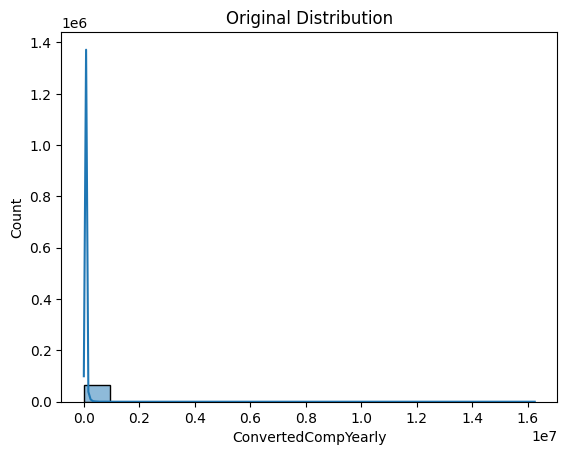

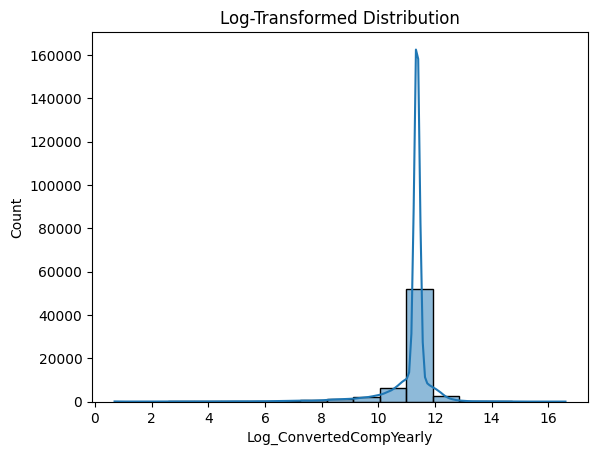

In [25]:
!pip install seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df['Log_ConvertedCompYearly'] = np.log(df['ConvertedCompYearly'] + 1)

sns.histplot(df['ConvertedCompYearly'], kde=True)
plt.title('Original Distribution')
plt.show()

sns.histplot(df['Log_ConvertedCompYearly'], kde=True)
plt.title('Log-Transformed Distribution')
plt.show()

### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [27]:
df['YearsCodePro'] = df['YearsCodePro'].replace({
    'Less than 1 year': '0',
    'More than 50 years': '51'
})

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
def categorize_experience(years):
    if pd.isnull(years):
        return 'Unknown'
    elif years < 3:
        return 'Junior'
    elif 3 <= years < 7:
        return 'Mid-level'
    else:
        return 'Senior'

df['ExperienceLevel'] = df['YearsCodePro'].apply(categorize_experience)
print(df['ExperienceLevel'].head())

0    Unknown
1     Senior
2     Senior
3    Unknown
4    Unknown
Name: ExperienceLevel, dtype: object


### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
